In [4]:
# ffe_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1.ffe'

# def read_ffe_file(file_path):
#     try:
#         with open(file_path, 'r') as file:
#             contents = file.readlines()
#             return contents[:100]     # 처음 10줄을 반환
#     except Exception as e:
#         return str(e)               # 출력

# read_ffe_file(ffe_path)

In [5]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# ffe 파일에서 필요한 고각, 방위각, RCS값을 추출한 후 csv파일로 생성

# 경로는 필요에 맞게 알맞게 수정

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1_Test2.csv'

def process_and_save_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = int(float(parts[0]))  # U 고각
            azimuth = int(float(parts[1]))  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in range(181):  # Elevation angles from 0 to 180 degrees
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

In [7]:
# 0도부터 180도까지만의 데이터가 있는 경우

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Kh58/Kh58_PO_3D_1_9GHz.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/Kh58/Kh58_PO_3D_1_9GHz_FFE.csv'

def process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = float(parts[0])  # U 고각
            azimuth = float(parts[1])  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    # 이 부분만 181~360도 데이터 처리 부분 추가
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in sorted(rcs_data.keys()):  # Elevation angles
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                if az <= 180:
                    rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                else:
                    rcs_value = rcs_data.get(el, {}).get(360 - az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

# Process the FFE file and save the output to CSV with symmetric azimuth angles
process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

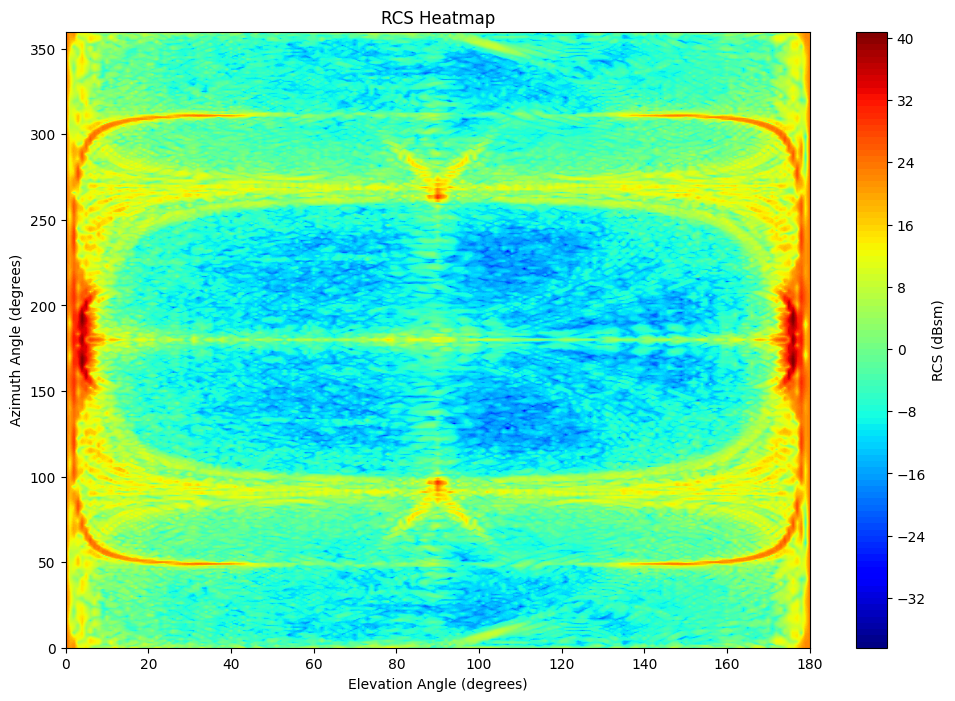

In [8]:
# 합쳐진 결과물 csv 파일을 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_1_9GHz_FFE.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Azimuth Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

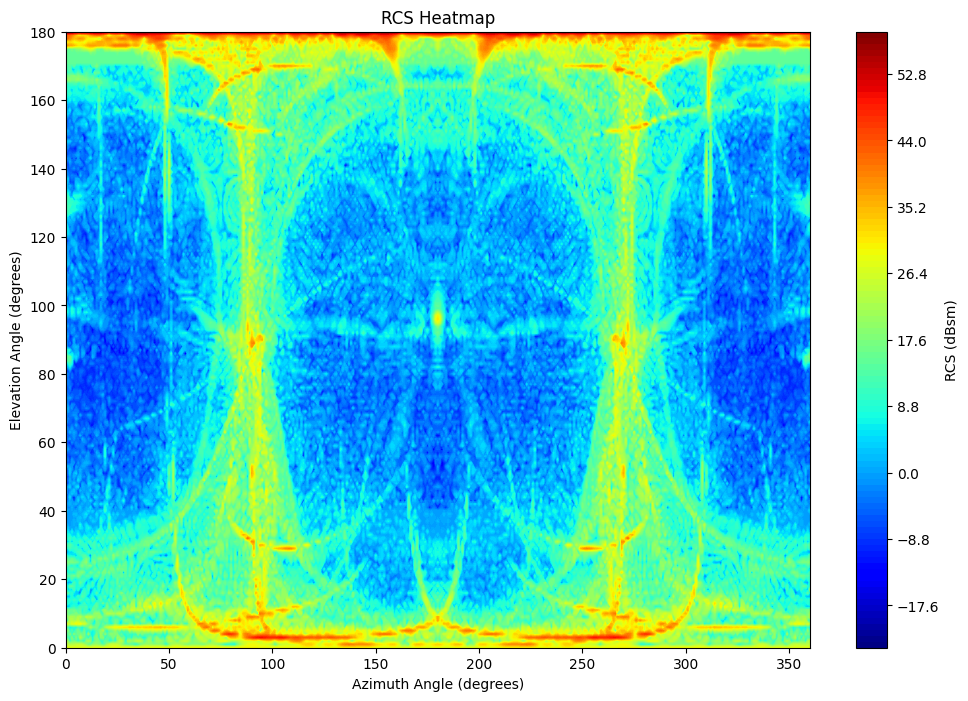

In [9]:
# 위 결과의 축을 뒤바꾸어 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_PEC_1.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap, swapping the index and columns
pivot_table = df.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Azimuth Angle (degrees)')
plt.ylabel('Elevation Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

In [11]:
# 행이 고각으로, 열이 방위각으로 구성된 csv 데이터파일을 생성
# 파일 이름은 알맞게 변경
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Kh58/Kh58_PO_3D_1_9GHz_FFE.csv'
new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Kh58/NEW_Kh58_PO_3D_1_9GHz_FFE.csv'
data = pd.read_csv(input_file_path)

# 데이터를 pivot하여 새로운 형태로 재구성
pivoted_data = data.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# 재구성된 데이터를 CSV 파일로 저장
pivoted_data.to_csv(new_file_path, header=False, index=False)

pivoted_data.head()

Azimuth Angle (degrees),0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0.0,21.031767,21.030968,21.030775,21.031188,21.032207,21.033830,21.036054,21.038877,21.042292,21.046295,...,21.046295,21.042292,21.038877,21.036054,21.033830,21.032207,21.031188,21.030775,21.030968,21.031767
1.0,17.262736,17.253756,17.244643,17.233884,17.222209,17.208556,17.194152,17.177321,17.159692,17.136666,...,17.136666,17.159692,17.177321,17.194152,17.208556,17.222209,17.233884,17.244643,17.253756,17.262736
2.0,15.305450,15.256691,15.125782,14.910739,14.611602,14.221745,13.739109,13.162148,12.486485,11.673781,...,11.673781,12.486485,13.162148,13.739109,14.221745,14.611602,14.910739,15.125782,15.256691,15.305450
3.0,13.401734,13.300424,13.075182,12.737326,12.296344,11.770799,11.163512,10.571384,9.981889,9.451830,...,9.451830,9.981889,10.571384,11.163512,11.770799,12.296344,12.737326,13.075182,13.300424,13.401734
4.0,-3.062899,-2.991464,-3.199253,-3.724159,-4.532371,-5.966093,-7.788933,-9.409962,-8.373282,-5.247924,...,-5.247924,-8.373282,-9.409962,-7.788933,-5.966093,-4.532371,-3.724159,-3.199253,-2.991464,-3.062899
